# ML Lab — Assignment: 2

Amishi Gupta
23/CS/048

Objective
Implement linear regression from scratch using numpy by (a) solving the normal equation, and
(b) using gradient descent. Secondly also implement it using scikit-learn’s LinearRegression.
Produce plots that show fit quality, (loss vs iterations), and gradient/ loss-surface visualizations.

In [1]:
#importing files
from google.colab import files
uploaded = files.upload()

Saving california_housing_test.csv to california_housing_test.csv
Saving california_housing_train.csv to california_housing_train.csv


In [19]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [6]:
#data preprocessing

#loading the train and test csvs
train = pd.read_csv('california_housing_train.csv')
test = pd.read_csv('california_housing_test.csv')

In [7]:
#seperating features and target
x_train= train.drop(columns=["median_house_value"]).values
y_train=train["median_house_value"].values.reshape(-1, 1)
x_test=test.drop(columns=["median_house_value"]).values
y_test =test["median_house_value"].values.reshape(-1, 1)

In [8]:
#standardize features
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [10]:
#intercept (bias) column of ones
x_train_scaled_bias = np.hstack([np.ones((x_train_sc.shape[0], 1)), x_train_sc])
x_test_scaled_bias = np.hstack([np.ones((x_test_sc.shape[0], 1)), x_test_sc])


In [11]:
#implementing normal equation (closed-form)
def normal_equation(x, y):
    theta = np.linalg.inv(x.T@x)@x.T@y
    return theta

theta_normal = normal_equation(x_train_scaled_bias, y_train)
y_pred_normal = x_test_scaled_bias@theta_normal

In [13]:
#implement batch gradient descent (iterative)
def gradient_descent(x,y,lr=0.01,n_iter=1000,tol=1e-6):
    #lr is learning rate (alpha)
    n_samples, n_features = x.shape
    #initializing
    theta = np.zeros((n_features,1))
    loss_history = []
    for i in range(n_iter):
        y_pred = x@theta
        error = y_pred-y
        loss = (1/(2*n_samples))*np.sum(error**2)
        loss_history.append(loss)

        gradient =(1/n_samples)*x.T@error
        theta = theta-lr*gradient

        #early stopping tolerance
        if i>0 and abs(loss_history[-2]-loss_history[-1])<tol:
            break

    return theta, loss_history

theta_gd,loss_history= gradient_descent(x_train_scaled_bias,y_train,lr=0.01,n_iter=5000)
y_pred_gd=x_test_scaled_bias@theta_gd


In [14]:
#comparisons with scikit-learn

#calculates optimal parameters
lr_model = LinearRegression()

#fit trains the model
lr_model.fit(x_train_sc,y_train)

#predicts output for test data
y_pred_sklearn = lr_model.predict(x_test_sc)

In [15]:
#checking first 5 predicted vals
print(y_pred_normal[:5])
print(y_pred_sklearn[:5])

[[352812.31112454]
 [212717.70074517]
 [272344.69951889]
 [314244.31934958]
 [119644.22238687]]
[[352812.31112454]
 [212717.70074517]
 [272344.69951889]
 [314244.31934958]
 [119644.22238687]]


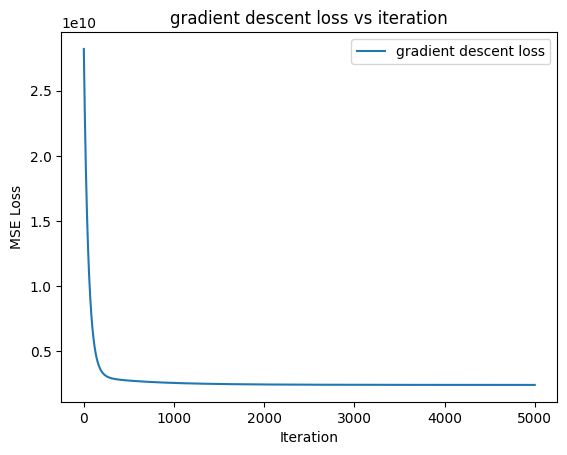

In [16]:
#visualization

#loss vs iterations
plt.plot(loss_history,label='gradient descent loss')
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("gradient descent loss vs iteration")
plt.legend()
plt.show()


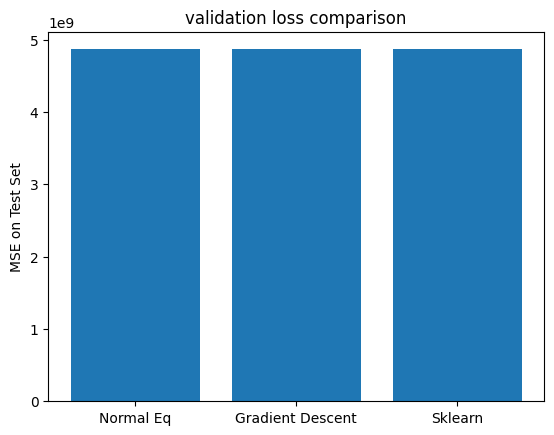

In [17]:
#validation loss comparison
plt.bar(["Normal Eq", "Gradient Descent", "Sklearn"],
        [mean_squared_error(y_test,y_pred_normal),
         mean_squared_error(y_test,y_pred_gd),
         mean_squared_error(y_test,y_pred_sklearn)])
plt.ylabel("MSE on Test Set")
plt.title("validation loss comparison")
plt.show()

In [20]:
#evaluation metrics

def evaluate(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} -> MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}, MAE: {mae:.2f}")

evaluate(y_test,y_pred_normal,"Normal Equation")
evaluate(y_test,y_pred_gd,"Gradient Descent")
evaluate(y_test,y_pred_sklearn,"Sklearn")

Normal Equation -> MSE: 4867205486.93, RMSE: 69765.36, R2: 0.6195, MAE: 50352.23
Gradient Descent -> MSE: 4867671119.90, RMSE: 69768.70, R2: 0.6195, MAE: 50292.76
Sklearn -> MSE: 4867205486.93, RMSE: 69765.36, R2: 0.6195, MAE: 50352.23
